In [1]:
#install.packages("data.table")

require(data.table)

Loading required package: data.table


In [2]:
data=read.csv("b67 tw_2018-09-10.csv" ,stringsAsFactors = FALSE)
data2=read.csv("b67 tw_2018-10-05.csv" ,stringsAsFactors = FALSE)
weather=read.csv("HistorianChart.csv" ,stringsAsFactors = FALSE)

In [3]:
names(data) = c('time','flow','energy','supply', 'return')
names(data2) = c('time','flow','energy','supply', 'return')
names(weather) = c('time','wb', 'db')
meter <- rbind( data, data2)

meter$btu <- with(meter, (500*flow * (return-supply) / 12000))

In [4]:
strptime(meter$time[1], "%m/%d/%Y %H:%M:%S")
meter$time <- strptime(meter$time, "%m/%d/%Y %H:%M:%S")
meter$time[1]

[1] "2018-09-06 14:16:30 UTC"

[1] "2018-09-06 14:16:30 UTC"

In [5]:
weather$time[2]
weather$time <- strptime(weather$time, "%Y-%m-%dT%H:%M:%S")
weather$time[2]

[1] "2018-09-06T01:00:00-07:00 Los_Angeles"

[1] "2018-09-06 01:00:00 UTC"

In [9]:
meter2 <- head(meter)
weather2 <- head(weather)

In [ ]:
meter[ time]

In [ ]:
# https://stackoverflow.com/questions/31818444/join-two-data-frames-in-r-based-on-closest-timestamp
# Here, val2 column is created by performing a join on the column date with roll = "nearest" option. 
# For each row of table1$date, the closest matching row from table2$date is computed, 
# and  val2 for corresponding row is extracted.
#
# setDT(table1)[, val2 := setDT(table2)[table1, val2, on = "date", roll = "nearest"]]

setDT(meter)[, db := setDT(weather)[ meter, db, on = "time", roll = "nearest"]]

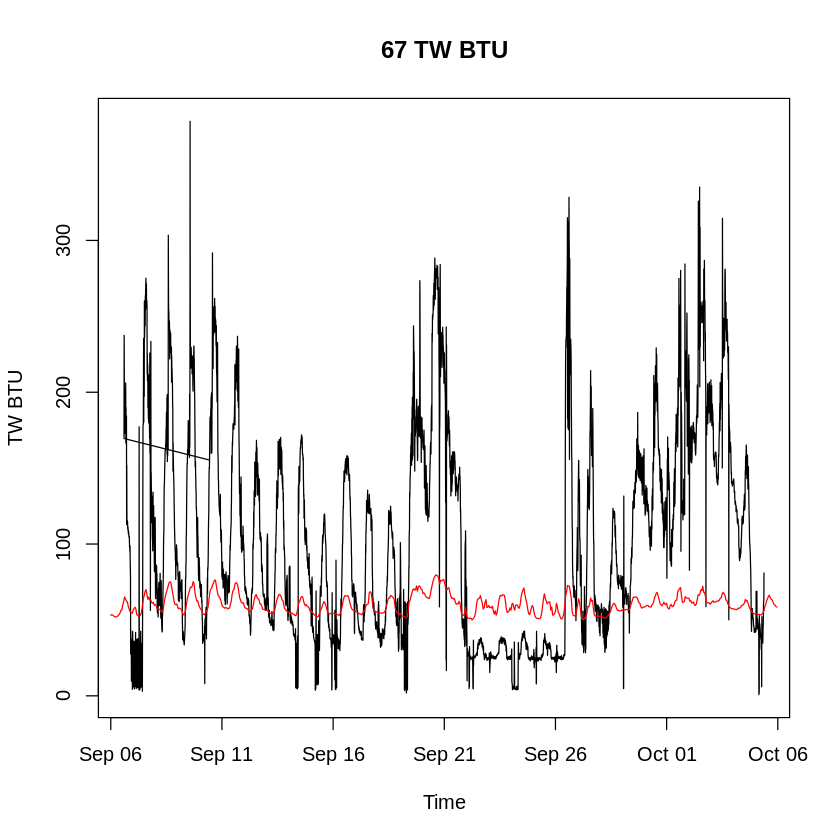

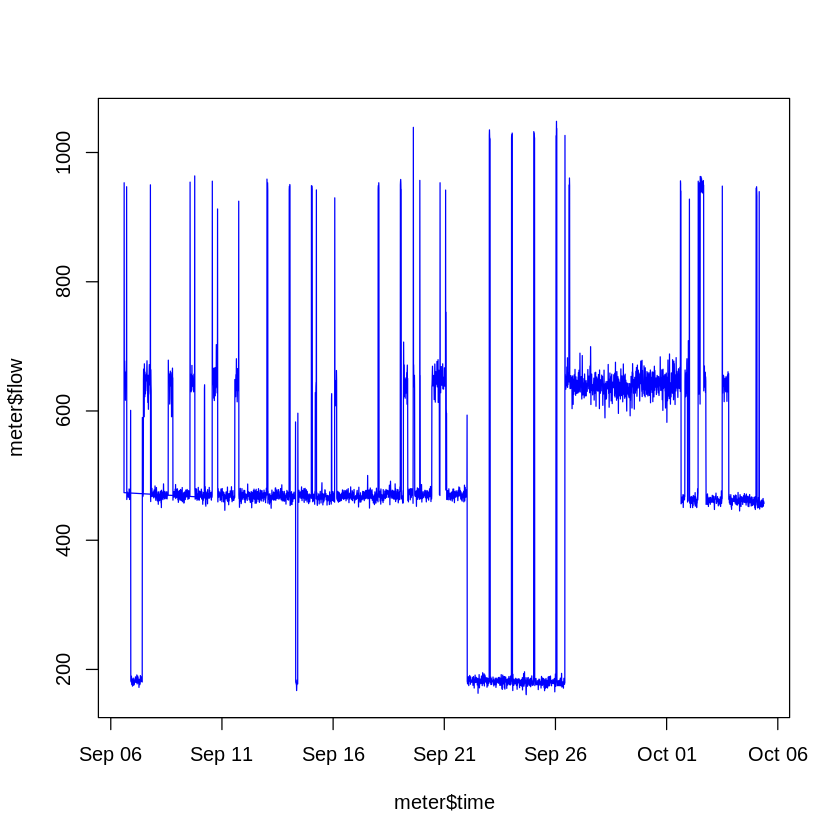

In [21]:
plot(meter$time, meter$btu, type='l',
    main="67 TW BTU",
    xlab="Time", ylab="TW BTU")
lines(weather$time, weather$db, col='red')
plot(meter$time, meter$flow, col='blue', type='l')

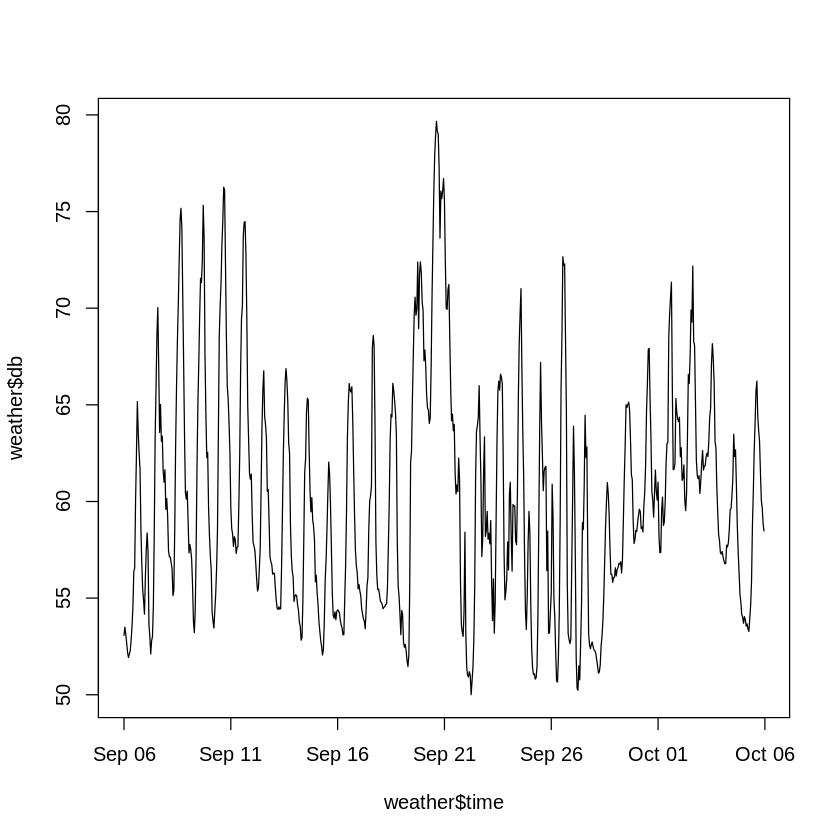

In [12]:
plot(weather$time, weather$db, type='l')

energy$btu <- with(energy, (flow * (return-supply) /12))

In [ ]:
weather <- read.csv('HistorianChart.csv')
names(weather) = c('time', 'wb', 'db')

In [ ]:
summary(weather)

In [ ]:
str(weather)

In [ ]:
head(as.timeDate(weather$time))

In [ ]:
??timeDate